In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, precision_score, recall_score, auc, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)

# Data Processing

In [129]:
df = pd.read_csv('/Users/appleisshit/Desktop/Credit (Clean Data)/clean_dataset.csv')
df = df.sample(frac=1, random_state=0)
df

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
14,0,45.83,10.500,1,1,Materials,White,5.000,1,1,7,1,ByBirth,0,0,1
586,1,64.08,20.000,1,1,Utilities,Black,17.500,1,1,9,1,ByBirth,0,1000,1
140,0,31.25,3.750,1,1,InformationTechnology,Black,0.625,1,1,9,1,ByBirth,181,0,1
492,1,39.25,9.500,1,1,CommunicationServices,White,6.500,1,1,14,0,ByBirth,240,4607,1
350,0,26.17,2.000,1,1,Research,Other,0.000,0,0,0,1,ByBirth,276,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,0,36.75,4.710,1,1,Healthcare,Latino,0.000,0,0,0,0,ByBirth,160,0,0
192,1,41.75,0.960,1,1,Utilities,White,2.500,1,0,0,0,ByBirth,510,600,1
629,0,19.58,0.665,1,1,Industrials,White,1.665,0,0,0,0,ByBirth,220,5,0
559,0,22.83,2.290,1,1,Materials,Black,2.290,1,1,7,1,ByBirth,140,2384,1


In [130]:
df.info()

# no null data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 14 to 684
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 91.6+ KB


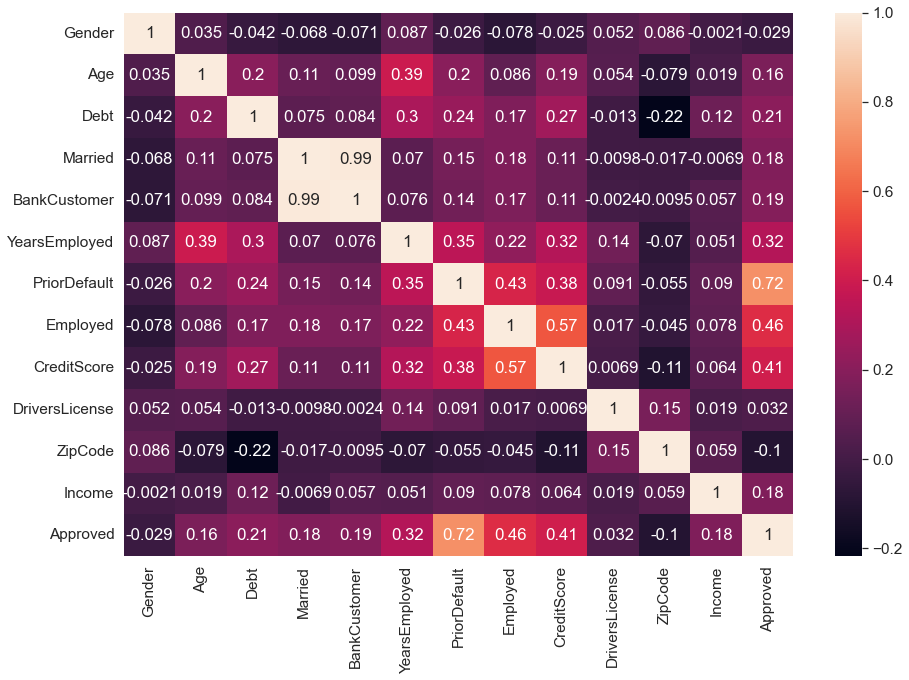

In [131]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# PriorDefault has a strong correlation to Approved/Not

## Gender

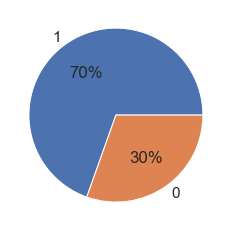

In [132]:
plt.pie(df['Gender'].value_counts(),autopct='%.f%%', labels=df['Gender'].value_counts().index);

# Dominated by Male (1)

## Age

In [133]:
df['Age'] = df['Age'].astype(int)

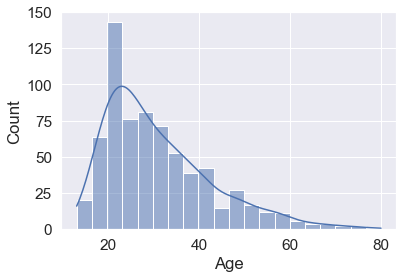

In [134]:
# Right Skewed Distribution

sns.histplot(df['Age'], kde=True);

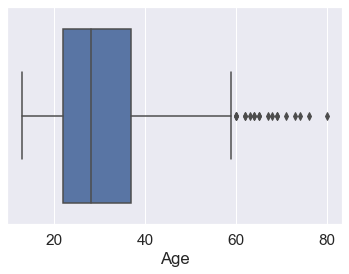

In [135]:
sns.boxplot(df['Age']);

## Debt

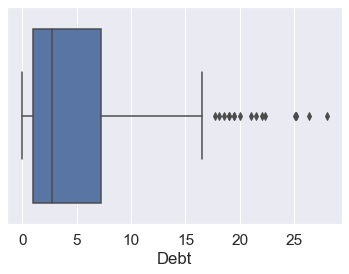

In [136]:
sns.boxplot(df['Debt']);

## Married

1    525
0    165
Name: Married, dtype: int64


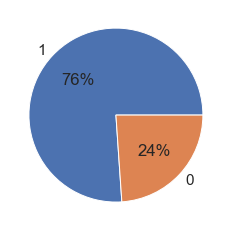

In [137]:
plt.pie(df['Married'].value_counts(),autopct='%.f%%', labels=df['Married'].value_counts().index);

print(df['Married'].value_counts())

# Most of them are married

## Bank Customer

1    527
0    163
Name: BankCustomer, dtype: int64


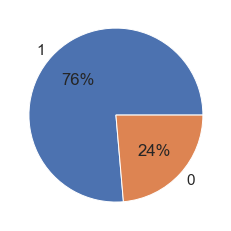

In [138]:
plt.pie(df['BankCustomer'].value_counts(),autopct='%.f%%', labels=df['BankCustomer'].value_counts().index);

print(df['BankCustomer'].value_counts())

# Most of them are bank customer

## Industry

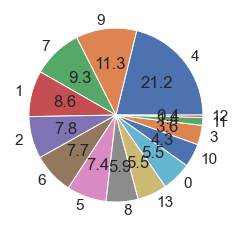

In [174]:
plt.pie(df['Industry'].value_counts(),autopct='%.1f',labels=df['Industry'].value_counts().index);

In [140]:
encoder = LabelEncoder().fit(df['Industry'])

df['Industry'] = encoder.transform(df['Industry'])

## Ethnicity

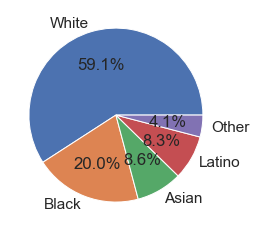

In [141]:
plt.pie(df['Ethnicity'].value_counts(),autopct='%.1f%%',labels=df['Ethnicity'].value_counts().index);

In [142]:
encoder = LabelEncoder().fit(df['Ethnicity'])

df['Ethnicity'] = encoder.transform(df['Ethnicity'])

## Prior Default

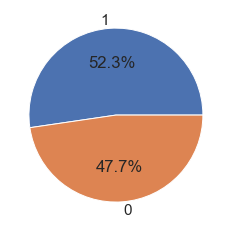

In [143]:
plt.pie(df['PriorDefault'].value_counts(),autopct='%.1f%%',labels=df['PriorDefault'].value_counts().index);

# more than 50% defaulted

## Employed

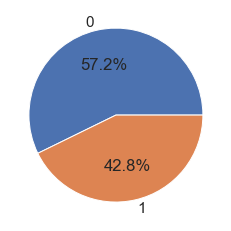

In [144]:
plt.pie(df['Employed'].value_counts(),autopct='%.1f%%',labels=df['Employed'].value_counts().index);

# more than 50% are unemployed

## Credit Score

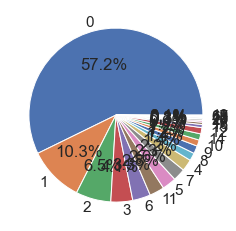

In [145]:
plt.pie(df['CreditScore'].value_counts(),autopct='%.1f%%',labels=df['CreditScore'].value_counts().index);

## Driver License

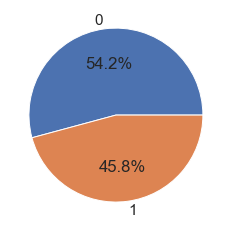

In [146]:
plt.pie(df['DriversLicense'].value_counts(),autopct='%.1f%%',labels=df['DriversLicense'].value_counts().index);

# more than 50% doesn't have driver license

## Citizen

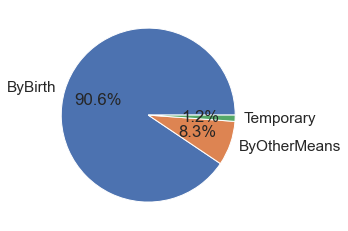

In [147]:
plt.pie(df['Citizen'].value_counts(),autopct='%.1f%%',labels=df['Citizen'].value_counts().index);

In [148]:
encoder = LabelEncoder().fit(df['Citizen'])

df['Citizen'] = encoder.transform(df['Citizen'])

## Approved

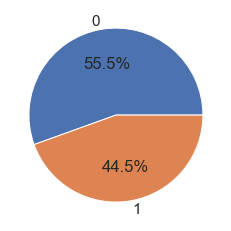

In [149]:
plt.pie(df['Approved'].value_counts(),autopct='%.1f%%',labels=df['Approved'].value_counts().index);

# more than 50% of them are not approved

# Modelling

In [150]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

## Scaling

In [152]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Scaled Data

In [153]:
pd.DataFrame(X_train_scaled, columns=df.columns[:15])

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,-1.504498,-0.781920,1.181125,-1.701517,-1.710798,1.025674,0.770546,0.256825,0.973438,-0.866025,-0.472991,1.088816,-0.301808,0.473725,-0.187926
1,0.664674,-0.025408,-0.357166,0.587711,0.584523,-0.477362,0.770546,0.102757,-1.027287,1.154701,-0.097552,1.088816,-0.301808,-0.121773,-0.180653
2,0.664674,-0.865977,-0.810976,-1.701517,-1.710798,1.927495,0.101169,-0.436483,-1.027287,-0.866025,-0.472991,1.088816,-0.301808,-0.276162,-0.187571
3,0.664674,1.319501,0.306544,0.587711,0.584523,-0.477362,0.770546,-0.359448,-1.027287,-0.866025,-0.472991,1.088816,-0.301808,-1.003992,-0.147486
4,-1.504498,-0.613806,1.472652,0.587711,0.584523,-1.078576,0.770546,-0.205380,0.973438,1.154701,1.779643,1.088816,-0.301808,-0.342328,-0.087358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0.664674,-1.034090,-0.616625,-1.701517,-1.710798,-0.477362,0.770546,0.051914,-1.027287,-0.866025,-0.472991,1.088816,-0.301808,-0.386439,-0.186861
479,-1.504498,-0.109465,1.375477,0.587711,0.584523,-0.477362,0.770546,-0.051312,0.973438,1.154701,-0.285271,-0.918429,-0.301808,0.209059,-0.184556
480,0.664674,-0.361636,-0.325098,-1.701517,-1.710798,1.025674,-1.237585,0.899291,-1.027287,1.154701,-0.097552,1.088816,-0.301808,1.030626,-0.187748
481,-1.504498,-0.529749,-0.956740,0.587711,0.584523,-0.477362,0.770546,-0.667585,-1.027287,-0.866025,-0.472991,-0.918429,5.529119,-1.003992,-0.187926


In [154]:
pd.DataFrame(X_test_scaled, columns=df.columns[:15])

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
0,0.664674,-0.781920,-0.463087,-1.701517,-1.710798,-0.477362,-1.237585,0.128949,0.973438,-0.866025,-0.472991,-0.918429,-0.301808,-1.003992,-0.187926
1,0.664674,-0.277579,-0.883858,0.587711,0.584523,1.326281,0.770546,-0.397966,0.973438,-0.866025,-0.472991,1.088816,2.613656,4.112879,-0.187926
2,0.664674,-0.697863,-0.762389,0.587711,0.584523,-0.477362,0.770546,-0.410291,0.973438,-0.866025,-0.472991,-0.918429,2.613656,0.650169,-0.187926
3,0.664674,0.562989,-0.819722,0.587711,0.584523,-0.477362,0.770546,-0.552034,-1.027287,1.154701,-0.097552,-0.918429,-0.301808,0.236628,-0.099241
4,0.664674,0.058648,-0.665213,0.587711,0.584523,0.725067,-1.237585,1.027168,0.973438,1.154701,0.090168,1.088816,-0.301808,-1.003992,-0.187926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-1.504498,-1.286261,-0.924672,0.587711,0.584523,-1.078576,0.770546,-0.359448,-1.027287,1.154701,-0.097552,1.088816,-0.301808,0.760446,-0.187748
203,0.664674,-0.950034,0.841010,0.587711,0.584523,-0.477362,0.770546,-0.154537,0.973438,1.154701,0.090168,1.088816,-0.301808,-0.783438,-0.182959
204,0.664674,-0.361636,-0.706027,0.587711,0.584523,-0.176755,-1.237585,-0.590551,-1.027287,-0.866025,-0.472991,1.088816,2.613656,-0.232051,-0.187926
205,0.664674,-0.445693,-0.762389,0.587711,0.584523,1.025674,0.770546,-0.128346,0.973438,-0.866025,-0.472991,1.088816,-0.301808,0.539891,-0.187926


## Logreg

In [155]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1)

logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

print(f"f1 score using LogReg = {np.round(f1_score(y_test, y_pred_logreg),2)}")
print(f"precision score using LogReg = {np.round(precision_score(y_test, y_pred_logreg),2)}")
print(f"recall score using LogReg = {np.round(recall_score(y_test, y_pred_logreg),2)}")
print('----------------------------')

pipeline_logreg = Pipeline([('scaler', StandardScaler()), ('logreg',LogisticRegression(C=0.1))])

print(f"avg f1 score (5x) = {np.round(np.mean(cross_val_score(pipeline_logreg, X, y, scoring='f1')),2)}")
print(f"avg precision score (5x) = {np.round(np.mean(cross_val_score(pipeline_logreg, X, y, scoring='precision')),2)}")
print(f"avg recall score (5x) = {np.round(np.mean(cross_val_score(pipeline_logreg, X, y, scoring='recall')),2)}")


f1 score using LogReg = 0.86
precision score using LogReg = 0.79
recall score using LogReg = 0.93
----------------------------
avg f1 score (5x) = 0.84
avg precision score (5x) = 0.82
avg recall score (5x) = 0.87


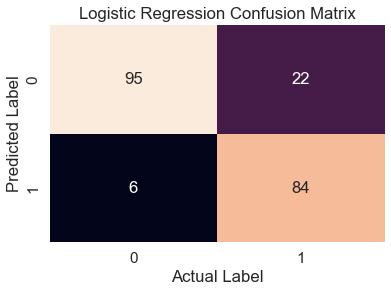

In [156]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=confusion_matrix(y_test, y_pred_logreg), cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Logistic Regression Confusion Matrix')

plt.show()

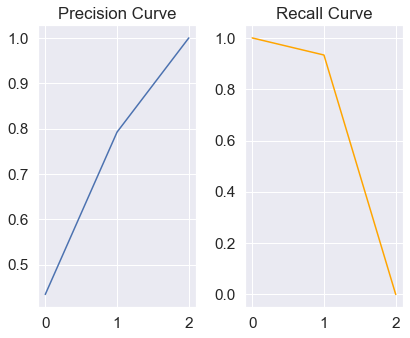

In [157]:
precision, recall, treshold = precision_recall_curve(y_test, y_pred_logreg)

fig,ax = plt.subplots(1,2, figsize=(6,5))
ax[0].plot(precision)
ax[0].set_title('Precision Curve')
ax[1].plot(recall, c='orange')
ax[1].set_title('Recall Curve')

plt.tight_layout()

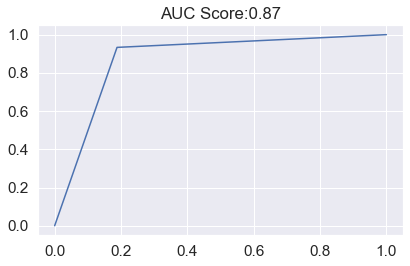

In [158]:
fpr, tpr, treshold2 = roc_curve(y_test, y_pred_logreg)

fig,ax = plt.subplots()
plt.plot(fpr,tpr)
plt.title('AUC Score:{}'.format(np.round(auc(fpr,tpr),2)))

plt.tight_layout()

In [159]:
logreg_inverse = pd.DataFrame(scaler.inverse_transform(X_test_scaled), columns=df.columns[:15])
logreg_inverse = logreg_inverse.drop('ZipCode',axis=1)
y_actual_logreg = pd.DataFrame(y_test, columns=['Actual'])
y_predict_logreg = pd.DataFrame(y_pred_logreg, columns=['Prediction'])

logreg_final =  pd.concat([logreg_inverse,y_actual_logreg,y_predict_logreg],axis=1)

print(f"miss prediction = {len(logreg_final[logreg_final['Actual'] != logreg_final['Prediction']])}")
logreg_final

miss prediction = 28


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Actual,Prediction
0,1.0,22.0,2.540,0.0,0.0,4.0,1.0,2.585,1.0,0.0,0.0,0.0,0.0,0.0,1,1
1,1.0,28.0,0.375,1.0,1.0,10.0,4.0,0.875,1.0,0.0,0.0,1.0,1.0,0.0,0,1
2,1.0,23.0,1.000,1.0,1.0,4.0,4.0,0.835,1.0,0.0,0.0,0.0,1.0,0.0,1,1
3,1.0,38.0,0.705,1.0,1.0,4.0,4.0,0.375,0.0,1.0,2.0,0.0,0.0,500.0,0,0
4,1.0,32.0,1.500,1.0,1.0,8.0,1.0,5.500,1.0,1.0,3.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0,16.0,0.165,1.0,1.0,2.0,4.0,1.000,0.0,1.0,2.0,1.0,0.0,1.0,0,0
203,1.0,20.0,9.250,1.0,1.0,4.0,4.0,1.665,1.0,1.0,3.0,1.0,0.0,28.0,1,1
204,1.0,27.0,1.290,1.0,1.0,5.0,1.0,0.250,0.0,0.0,0.0,1.0,1.0,0.0,0,0
205,1.0,26.0,1.000,1.0,1.0,9.0,4.0,1.750,1.0,0.0,0.0,1.0,0.0,0.0,1,1


## SVC

In [160]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

print(f"f1 score using svc = {np.round(f1_score(y_test, y_pred_svc),2)}")
print(f"precision score using svc = {np.round(precision_score(y_test, y_pred_svc),2)}")
print(f"recall score using svc = {np.round(recall_score(y_test, y_pred_svc),2)}")
print('----------------------------')

pipeline_svc = Pipeline([('scaler', StandardScaler()), ('svc',SVC())])

print(f"avg f1 score (5x) = {np.round(np.mean(cross_val_score(pipeline_svc, X, y, scoring='f1')),2)}")
print(f"avg precision score (5x) = {np.round(np.mean(cross_val_score(pipeline_svc, X, y, scoring='precision')),2)}")
print(f"avg recall score (5x) = {np.round(np.mean(cross_val_score(pipeline_svc, X, y, scoring='recall')),2)}")


f1 score using svc = 0.85
precision score using svc = 0.8
recall score using svc = 0.91
----------------------------
avg f1 score (5x) = 0.84
avg precision score (5x) = 0.8
avg recall score (5x) = 0.88


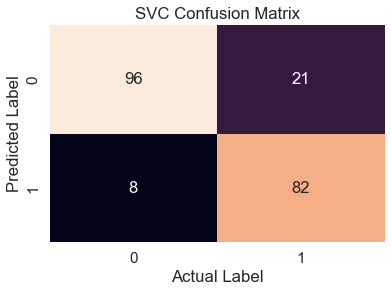

In [161]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=confusion_matrix(y_test, y_pred_svc), cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('SVC Confusion Matrix')

plt.show()

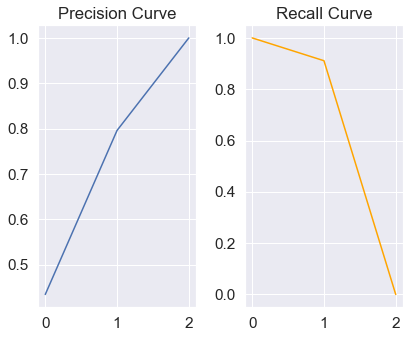

In [162]:
precision, recall, treshold = precision_recall_curve(y_test, y_pred_svc)

fig,ax = plt.subplots(1,2, figsize=(6,5))
ax[0].plot(precision)
ax[0].set_title('Precision Curve')
ax[1].plot(recall, c='orange')
ax[1].set_title('Recall Curve')

plt.tight_layout()

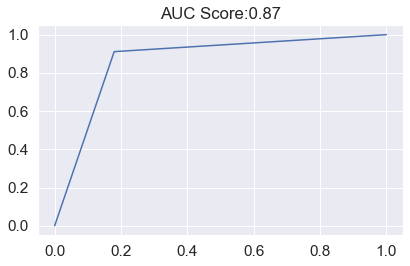

In [163]:
fpr, tpr, treshold2 = roc_curve(y_test, y_pred_svc)

fig,ax = plt.subplots()
plt.plot(fpr,tpr)
plt.title('AUC Score:{}'.format(np.round(auc(fpr,tpr),2)))

plt.tight_layout()

In [164]:
svc_inverse = pd.DataFrame(scaler.inverse_transform(X_test_scaled), columns=df.columns[:15])
svc_inverse = svc_inverse.drop('ZipCode',axis=1)
y_actual_svc = pd.DataFrame(y_test, columns=['Actual'])
y_predict_svc = pd.DataFrame(y_pred_svc, columns=['Prediction'])

svc_final =  pd.concat([svc_inverse,y_actual_svc,y_predict_svc],axis=1)

print(f"miss prediction = {len(svc_final[svc_final['Actual'] != svc_final['Prediction']])}")
svc_final

miss prediction = 29


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Actual,Prediction
0,1.0,22.0,2.540,0.0,0.0,4.0,1.0,2.585,1.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1.0,28.0,0.375,1.0,1.0,10.0,4.0,0.875,1.0,0.0,0.0,1.0,1.0,0.0,0,1
2,1.0,23.0,1.000,1.0,1.0,4.0,4.0,0.835,1.0,0.0,0.0,0.0,1.0,0.0,1,1
3,1.0,38.0,0.705,1.0,1.0,4.0,4.0,0.375,0.0,1.0,2.0,0.0,0.0,500.0,0,0
4,1.0,32.0,1.500,1.0,1.0,8.0,1.0,5.500,1.0,1.0,3.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0,16.0,0.165,1.0,1.0,2.0,4.0,1.000,0.0,1.0,2.0,1.0,0.0,1.0,0,0
203,1.0,20.0,9.250,1.0,1.0,4.0,4.0,1.665,1.0,1.0,3.0,1.0,0.0,28.0,1,1
204,1.0,27.0,1.290,1.0,1.0,5.0,1.0,0.250,0.0,0.0,0.0,1.0,1.0,0.0,0,0
205,1.0,26.0,1.000,1.0,1.0,9.0,4.0,1.750,1.0,0.0,0.0,1.0,0.0,0.0,1,1


## Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=3)

rfc.fit(X_train_scaled, y_train)

y_pred_rfc = rfc.predict(X_test_scaled)

print(f"f1 score using rfc = {np.round(f1_score(y_test, y_pred_rfc),2)}")
print(f"precision score using rfc = {np.round(precision_score(y_test, y_pred_rfc),2)}")
print(f"recall score using rfc = {np.round(recall_score(y_test, y_pred_rfc),2)}")
print('----------------------------')

pipeline_rfc = Pipeline([('scaler', StandardScaler()), ('rfc',RandomForestClassifier(max_depth=3))])

print(f"avg f1 score (5x) = {np.round(np.mean(cross_val_score(pipeline_rfc, X, y, scoring='f1')),2)}")
print(f"avg precision score (5x) = {np.round(np.mean(cross_val_score(pipeline_rfc, X, y, scoring='precision')),2)}")
print(f"avg recall score (5x) = {np.round(np.mean(cross_val_score(pipeline_rfc, X, y, scoring='recall')),2)}")

f1 score using rfc = 0.85
precision score using rfc = 0.85
recall score using rfc = 0.86
----------------------------
avg f1 score (5x) = 0.84
avg precision score (5x) = 0.87
avg recall score (5x) = 0.79


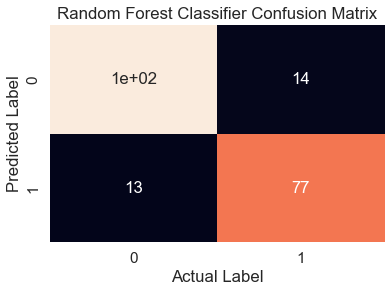

In [166]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=confusion_matrix(y_test, y_pred_rfc), cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('Random Forest Classifier Confusion Matrix')

plt.show()

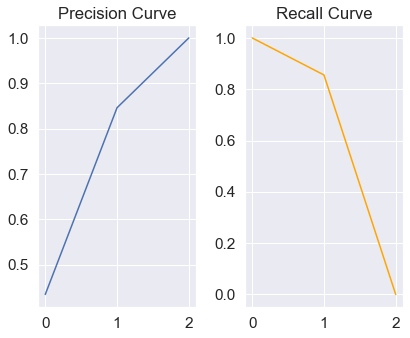

In [167]:
precision, recall, treshold = precision_recall_curve(y_test, y_pred_rfc)

fig,ax = plt.subplots(1,2, figsize=(6,5))
ax[0].plot(precision)
ax[0].set_title('Precision Curve')
ax[1].plot(recall, c='orange')
ax[1].set_title('Recall Curve')

plt.tight_layout()

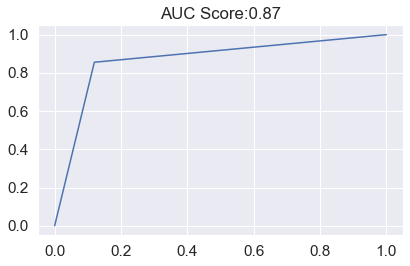

In [168]:
fpr, tpr, treshold2 = roc_curve(y_test, y_pred_rfc)

fig,ax = plt.subplots()
plt.plot(fpr,tpr)
plt.title('AUC Score:{}'.format(np.round(auc(fpr,tpr),2)))

plt.tight_layout()

In [169]:
rfc_inverse = pd.DataFrame(scaler.inverse_transform(X_test_scaled), columns=df.columns[:15])
rfc_inverse = rfc_inverse.drop('ZipCode',axis=1)
y_actual_rfc = pd.DataFrame(y_test, columns=['Actual'])
y_predict_rfc = pd.DataFrame(y_pred_rfc, columns=['Prediction'])

rfc_final =  pd.concat([rfc_inverse,y_actual_rfc,y_predict_rfc],axis=1)

print(f"miss prediction = {len(rfc_final[rfc_final['Actual'] != rfc_final['Prediction']])} over {len(rfc_final)} items")
rfc_final

miss prediction = 27 over 207 items


,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Actual,Prediction
0,1.0,22.0,2.540,0.0,0.0,4.0,1.0,2.585,1.0,0.0,0.0,0.0,0.0,0.0,1,0
1,1.0,28.0,0.375,1.0,1.0,10.0,4.0,0.875,1.0,0.0,0.0,1.0,1.0,0.0,0,0
2,1.0,23.0,1.000,1.0,1.0,4.0,4.0,0.835,1.0,0.0,0.0,0.0,1.0,0.0,1,0
3,1.0,38.0,0.705,1.0,1.0,4.0,4.0,0.375,0.0,1.0,2.0,0.0,0.0,500.0,0,0
4,1.0,32.0,1.500,1.0,1.0,8.0,1.0,5.500,1.0,1.0,3.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0,16.0,0.165,1.0,1.0,2.0,4.0,1.000,0.0,1.0,2.0,1.0,0.0,1.0,0,0
203,1.0,20.0,9.250,1.0,1.0,4.0,4.0,1.665,1.0,1.0,3.0,1.0,0.0,28.0,1,1
204,1.0,27.0,1.290,1.0,1.0,5.0,1.0,0.250,0.0,0.0,0.0,1.0,1.0,0.0,0,0
205,1.0,26.0,1.000,1.0,1.0,9.0,4.0,1.750,1.0,0.0,0.0,1.0,0.0,0.0,1,1


## CatBoost

In [170]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(verbose=0)

cb.fit(X_train, y_train)

y_pred_cb = cb.predict(X_test)

print(f"f1 score using cb = {np.round(f1_score(y_test, y_pred_cb),2)}")
print(f"precision score using cb = {np.round(precision_score(y_test, y_pred_cb),2)}")
print(f"recall score using cb = {np.round(recall_score(y_test, y_pred_cb),2)}")
print('----------------------------')

pipeline_cb = Pipeline([('scaler', StandardScaler()), ('cb',CatBoostClassifier(verbose=0))])

print(f"avg f1 score (5x) = {np.round(np.mean(cross_val_score(pipeline_cb, X, y, scoring='f1')),2)}")
print(f"avg precision score (5x) = {np.round(np.mean(cross_val_score(pipeline_cb, X, y, scoring='precision')),2)}")
print(f"avg recall score (5x) = {np.round(np.mean(cross_val_score(pipeline_cb, X, y, scoring='recall')),2)}")

f1 score using cb = 0.87
precision score using cb = 0.84
recall score using cb = 0.91
----------------------------
avg f1 score (5x) = 0.85
avg precision score (5x) = 0.85
avg recall score (5x) = 0.86


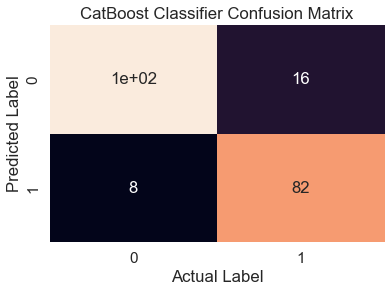

In [171]:
sns.set(font_scale=1.4)
sns.heatmap(confusion_matrix(y_test, y_pred_cb), annot=confusion_matrix(y_test, y_pred_cb), cbar=False)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.title('CatBoost Classifier Confusion Matrix')

plt.show()

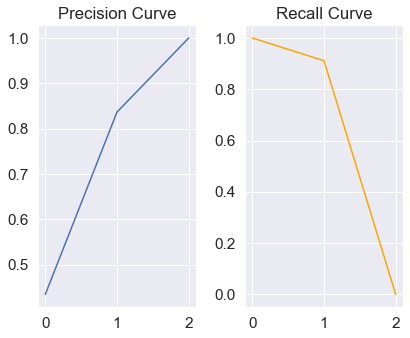

In [172]:
precision, recall, treshold = precision_recall_curve(y_test, y_pred_cb)

fig,ax = plt.subplots(1,2, figsize=(6,5))
ax[0].plot(precision)
ax[0].set_title('Precision Curve')
ax[1].plot(recall, c='orange')
ax[1].set_title('Recall Curve')

plt.tight_layout()

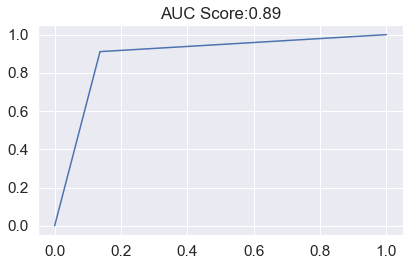

In [173]:
fpr, tpr, treshold2 = roc_curve(y_test, y_pred_cb)

fig,ax = plt.subplots()
plt.plot(fpr,tpr)
plt.title('AUC Score:{}'.format(np.round(auc(fpr,tpr),2)))

plt.tight_layout()